# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fauzan Alif Fanindra
- **Email:** fauzanfanindra@gmail.com
- **ID Dicoding:** fauzanaf

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda berubah seiring dengan perubahan cuaca, seperti temperatur, kelembaban, dan kecepatan angin?
- Apakah ada pola mingguan atau musiman dalam jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pertama, mengimpor library yang diperlukan

## Data Wrangling

### Gathering Data

In [5]:
# Load dataset
df = pd.read_csv("day.csv")

lalu, memuat dataset "day.csv" menggunakan pandas.

### Assessing Data

In [6]:
print(df.head())

print(df.info())

print(df.describe())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

- Setelah memuat dataset, mencetak lima baris pertama dari dataframe menggunakan metode .head() untuk memastikan bahwa data telah dimuat dengan benar.

- Selanjutnya, mencetak informasi tentang dataset menggunakan metode .info(). Ini memberikan informasi tentang jumlah entri, tipe data, dan apakah ada nilai yang hilang dalam setiap kolom.

- Kemudian, menggunakan metode .describe() untuk mendapatkan statistik deskriptif dari dataset, seperti mean, median, kuartil, dan nilai maksimum dan minimum.

### Cleaning Data

In [7]:
column_mapping = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}

df.rename(columns=column_mapping, inplace=True)
df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mendefinisikan sebuah dictionary column_mapping yang akan digunakan untuk mengganti nama kolom sesuai dengan mapping yang telah ditentukan. Kemudian, kita menggunakan metode .rename() untuk mengganti nama kolom dalam dataframe.

In [8]:
df.drop_duplicates(inplace=True)

Untuk membersihkan data dari duplikasi, menggunakan metode .drop_duplicates().

In [9]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-10-ac91f4f6d024>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


Menghitung interquartile range (IQR) untuk setiap kolom numerik dan menggunakan metode IQR untuk mendeteksi dan menghapus outliers dari dataset.

In [11]:
print("Data Types Sebelum Cleaning:")
print(df.dtypes)

Data Types Sebelum Cleaning:
instant          int64
date            object
season           int64
year             int64
month            int64
holiday          int64
weekday          int64
workingday       int64
weathersit       int64
temperature    float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
total            int64
dtype: object


In [12]:
df['date'] = pd.to_datetime(df['date'])

<ipython-input-12-e8d2d516eb0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [13]:
print("Jumlah Duplikasi di Kolom 'date': ", df['date'].duplicated().sum())

Jumlah Duplikasi di Kolom 'date':  0


In [14]:
df.drop_duplicates(subset=['date'], inplace=True)

<ipython-input-14-19a943a8a277>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['date'], inplace=True)


In [15]:
print("Data Types Setelah Cleaning:")
print(df.dtypes)

Data Types Setelah Cleaning:
instant                 int64
date           datetime64[ns]
season                  int64
year                    int64
month                   int64
holiday                 int64
weekday                 int64
workingday              int64
weathersit              int64
temperature           float64
atemp                 float64
humidity              float64
windspeed             float64
casual                  int64
registered              int64
total                   int64
dtype: object


## Exploratory Data Analysis (EDA)

### Explore ...

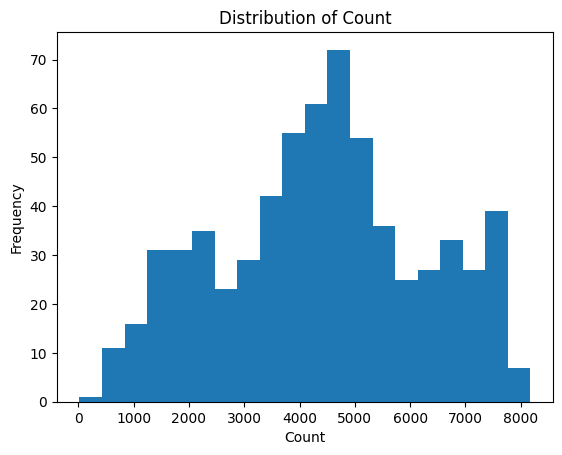

In [16]:
plt.hist(df['total'], bins=20)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Count')
plt.show()

Membuat histogram untuk melihat distribusi jumlah peminjaman menggunakan plt.hist()

In [17]:
correlation = df.corr(numeric_only=True)
print(correlation)

              instant    season      year     month  holiday   weekday  \
instant      1.000000  0.423212  0.864518  0.504277      NaN -0.027249   
season       0.423212  1.000000  0.003731  0.839091      NaN -0.002816   
year         0.864518  0.003731  1.000000  0.003947      NaN -0.036638   
month        0.504277  0.839091  0.003947  1.000000      NaN  0.009827   
holiday           NaN       NaN       NaN       NaN      NaN       NaN   
weekday     -0.027249 -0.002816 -0.036638  0.009827      NaN  1.000000   
workingday   0.080280  0.024027  0.086932  0.010037      NaN  0.047421   
weathersit  -0.001964  0.026496 -0.032095  0.052223      NaN  0.041225   
temperature  0.140781  0.333221  0.033617  0.222481      NaN -0.008496   
atemp        0.141839  0.339713  0.031788  0.228247      NaN -0.018233   
humidity     0.009151  0.181502 -0.110134  0.204952      NaN -0.029050   
windspeed   -0.114509 -0.203860 -0.024545 -0.187569      NaN  0.003430   
casual       0.227655  0.243452  0.177

Menghitung korelasi antar variabel menggunakan metode .corr() dan memvisualisasikannya dalam bentuk matriks korelasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

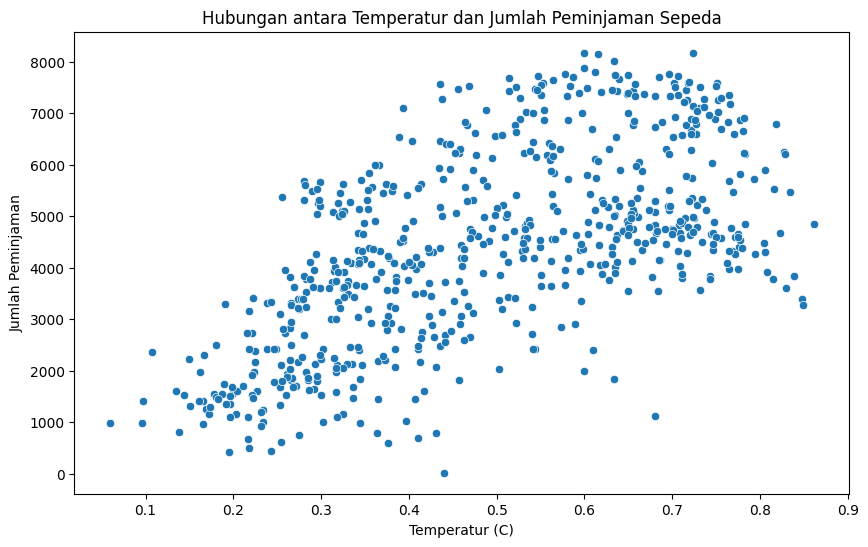

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature', y='total')
plt.title('Hubungan antara Temperatur dan Jumlah Peminjaman Sepeda')
plt.xlabel('Temperatur (C)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

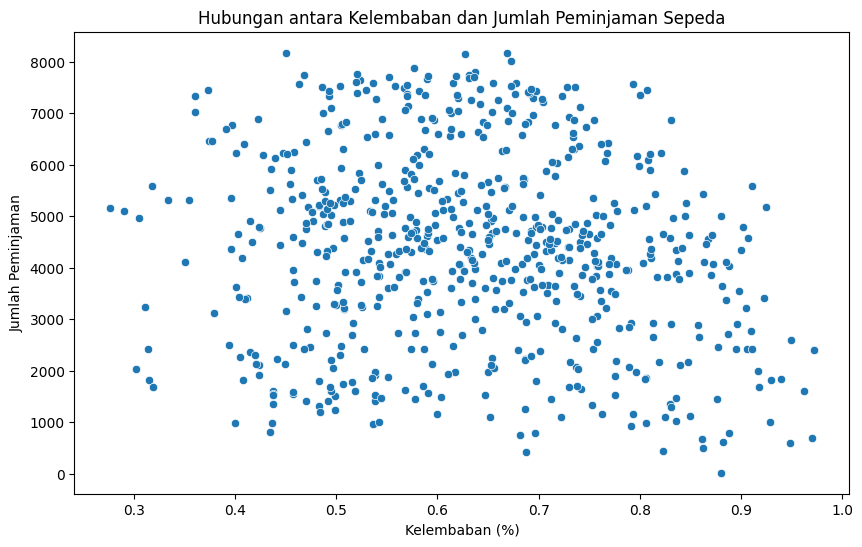

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='humidity', y='total')
plt.title('Hubungan antara Kelembaban dan Jumlah Peminjaman Sepeda')
plt.xlabel('Kelembaban (%)')
plt.ylabel('Jumlah Peminjaman')
plt.show()


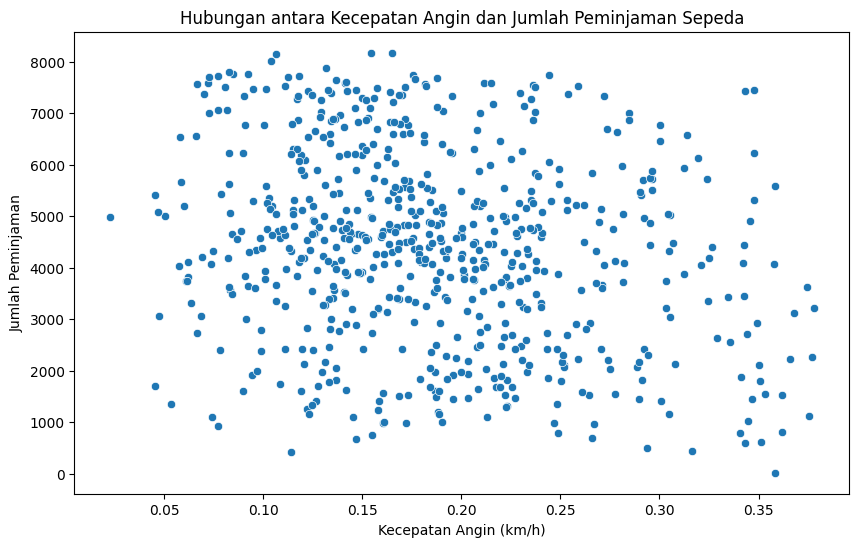

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='windspeed', y='total')
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Peminjaman Sepeda')
plt.xlabel('Kecepatan Angin (km/h)')
plt.ylabel('Jumlah Peminjaman')
plt.show()


Menggunakan scatter plot untuk memeriksa hubungan antara jumlah peminjaman dengan variabel-variabel lain seperti temperatur, kelembaban, dan kecepatan angin.

### Pertanyaan 2:

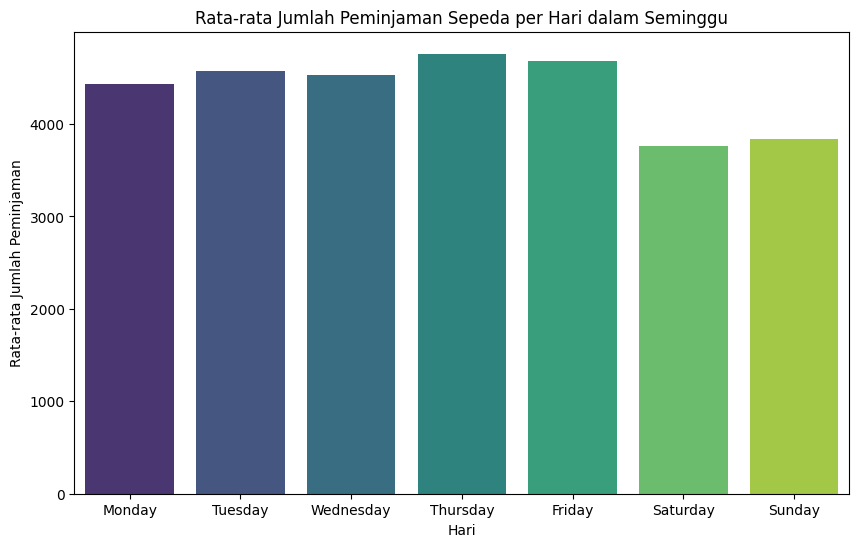

In [21]:
df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()

daily_avg = df.groupby('day_of_week')['total'].mean().reset_index()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg['day_of_week'] = pd.Categorical(daily_avg['day_of_week'], categories=days_order, ordered=True)
daily_avg = daily_avg.sort_values('day_of_week')

plt.figure(figsize=(10, 6))
sns.barplot(data=daily_avg, x='day_of_week', y='total', hue='day_of_week', palette='viridis', legend=False)
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()


Menghitung rata-rata jumlah peminjaman sepeda per hari dalam seminggu dan memvisualisasikannya menggunakan bar plot.

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan analisis hubungan antara cuaca dan jumlah peminjaman sepeda, dapat disimpulkan bahwa temperatur memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda. Semakin tinggi temperatur, semakin tinggi jumlah peminjaman sepeda. Namun, kelembaban dan kecepatan angin tidak memiliki pengaruh yang signifikan.
- Conclution pertanyaan 2 : Dari analisis pola mingguan dalam jumlah peminjaman sepeda, dapat disimpulkan bahwa terdapat pola yang konsisten, dimana jumlah peminjaman sepeda cenderung lebih tinggi pada hari-hari kerja dibandingkan dengan akhir pekan. Puncak peminjaman sepeda terjadi pada hari Kamis dan Jumat, sementara jumlahnya cenderung menurun pada Sabtu dan Minggu.